#Download Crop Faces

In [ ]:
%cd /content/WIKI_CROP
!wget https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki_crop.tar

In [ ]:
!tar -xvf wiki_crop.tar

# Wiki Trained Model

In [ ]:
%cd /content
!wget https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/dex_imdb_wiki.caffemodel
!wget https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/age.prototxt

      REAL Age:    38
 PREDICTED Age:    35
CLASSIFICATION: [20 - 40)


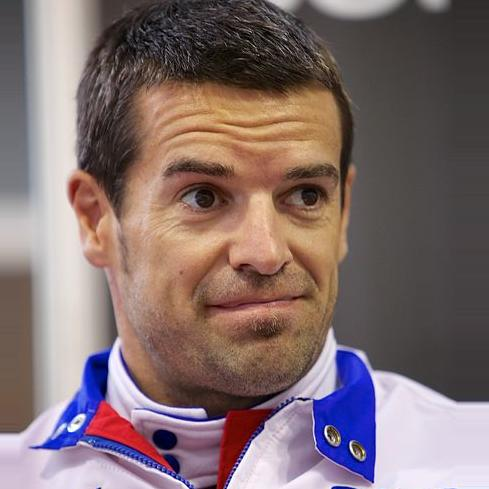



      REAL Age:    31
 PREDICTED Age:    17
CLASSIFICATION: [0 - 20)


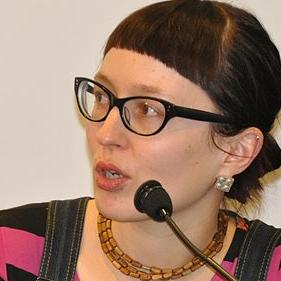



      REAL Age:    26
 PREDICTED Age:    25
CLASSIFICATION: [20 - 40)


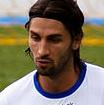



      REAL Age:    49
 PREDICTED Age:    54
CLASSIFICATION: [40 - 60)


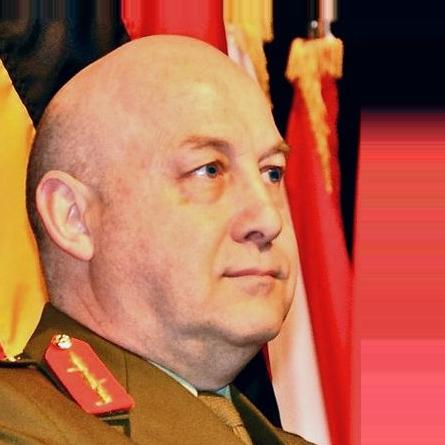



      REAL Age:    58
 PREDICTED Age:    44
CLASSIFICATION: [40 - 60)


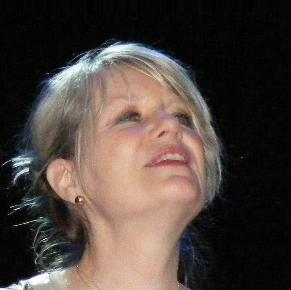



      REAL Age:    60
 PREDICTED Age:    38
CLASSIFICATION: [20 - 40)




      REAL Age:    25
 PREDICTED Age:    28
CLASSIFICATION: [20 - 40)


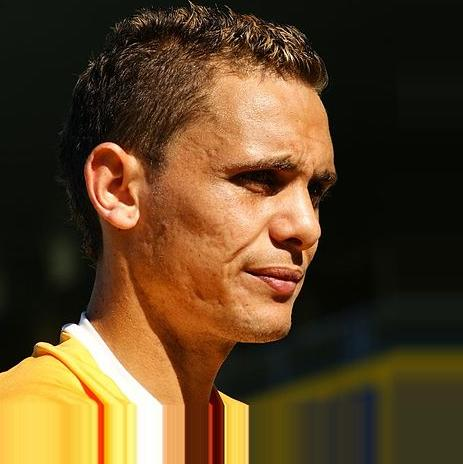



      REAL Age:    34
 PREDICTED Age:    36
CLASSIFICATION: [20 - 40)


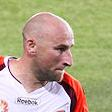



      REAL Age:    29
 PREDICTED Age:    38
CLASSIFICATION: [20 - 40)




      REAL Age:    44
 PREDICTED Age:    56
CLASSIFICATION: [40 - 60)


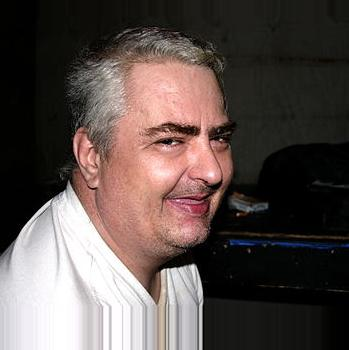



      REAL Age:    68
 PREDICTED Age:    68
CLASSIFICATION: [60 - 80)


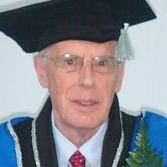



      REAL Age:    21
 PREDICTED Age:    18
CLASSIFICATION: [0 - 20)


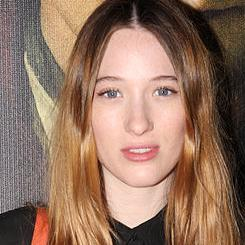



      REAL Age:    19
 PREDICTED Age:    21
CLASSIFICATION: [20 - 40)


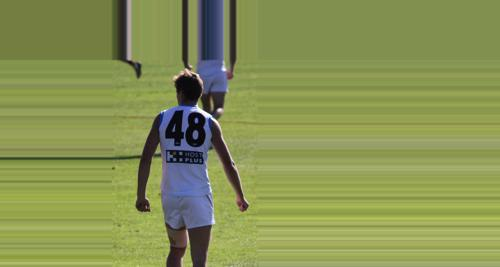



      REAL Age:    19
 PREDICTED Age:    38
CLASSIFICATION: [20 - 40)




      REAL Age:    39
 PREDICTED Age:    47
CLASSIFICATION: [40 - 60)


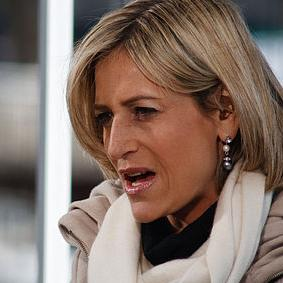



      REAL Age:    19
 PREDICTED Age:    38
CLASSIFICATION: [20 - 40)




      REAL Age:    28
 PREDICTED Age:    38
CLASSIFICATION: [20 - 40)




      REAL Age:    22
 PREDICTED Age:    25
CLASSIFICATION: [20 - 40)


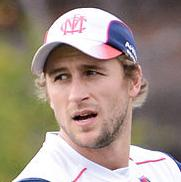



      REAL Age:    24
 PREDICTED Age:    38
CLASSIFICATION: [20 - 40)




      REAL Age:    65
 PREDICTED Age:    59
CLASSIFICATION: [40 - 60)


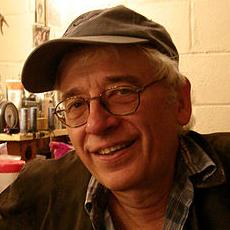



      REAL Age:    58
 PREDICTED Age:    62
CLASSIFICATION: [60 - 80)


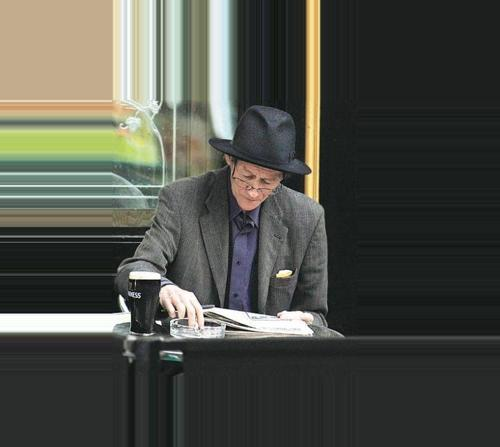



      REAL Age:    19
 PREDICTED Age:    32
CLASSIFICATION: [20 - 40)


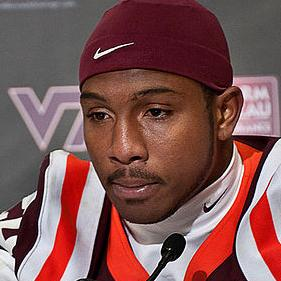



      REAL Age:    20
 PREDICTED Age:    35
CLASSIFICATION: [20 - 40)


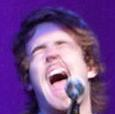



      REAL Age:    30
 PREDICTED Age:    26
CLASSIFICATION: [20 - 40)


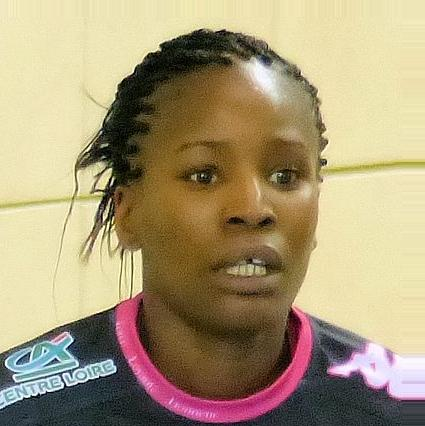



      REAL Age:    47
 PREDICTED Age:    49
CLASSIFICATION: [40 - 60)


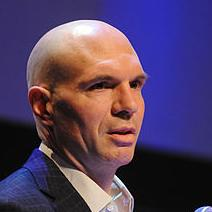



      REAL Age:    54
 PREDICTED Age:    44
CLASSIFICATION: [40 - 60)


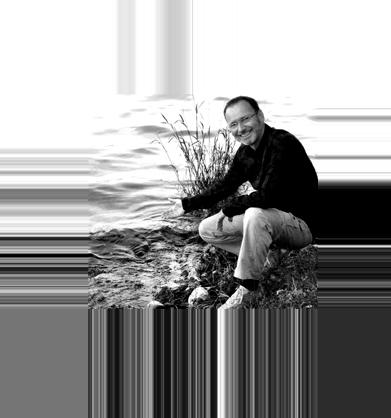



      REAL Age:    48
 PREDICTED Age:    45
CLASSIFICATION: [40 - 60)


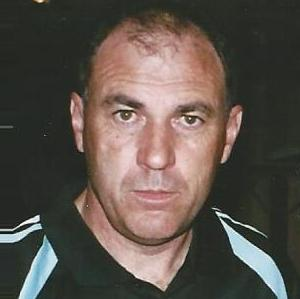



      REAL Age:    29
 PREDICTED Age:    37
CLASSIFICATION: [20 - 40)


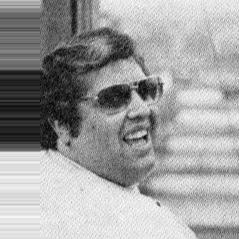



      REAL Age:    23
 PREDICTED Age:    24
CLASSIFICATION: [20 - 40)


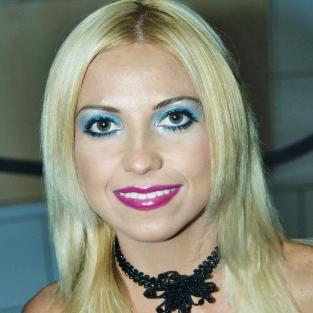



ACCURACY: 0.6551724137931034
 RUNTIME: 13.961377620697021


In [ ]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np
import time
import cv2



# Return bin classification
def classify(age):
  if age < 20:
    return 0
  elif 20 <= age < 40:
    return 1
  elif 40 <= age < 60:
    return 2
  elif 60 <= age < 80:
    return 3
  elif 80 <= age <= 100:
    return 4



ages = []
correct_predictions = 0
total_images = 0

# Load wiki facts
annots = loadmat("/content/WIKI_CROP/wiki_crop/wiki.mat")
wiki = annots['wiki'][0][0]

# Prediction model
model = cv2.dnn.readNetFromCaffe("age.prototxt", "dex_imdb_wiki.caffemodel")

start = time.time()
for i in range(61990, 62020):

    # Info
    filename = wiki[2][0][i][0]
    born = wiki[0][0][i]
    pic_time = wiki[1][0][i]

    # Real age
    img = cv2.imread("/content/WIKI_CROP/wiki_crop/" + filename)
    real_age = pic_time - int(born / 365)

    # Skip iteration if labeled data is wrong
    if (real_age < 0):
      continue

    # Predicted age
    blob = cv2.dnn.blobFromImage(img, 1, (224, 224), (104, 117, 123))
    model.setInput(blob)
    weights = model.forward()
    age_index = np.array([i for i in range(0, 101)])
    prediction = round(np.sum(weights[0] * age_index)) # Softmax
    ages.append(prediction)

    # Classification
    str_range = ""
    bin = classify(prediction)
    match bin:
      case 0:
        str_range = "[0 - 20)"
      case 1:
        str_range = "[20 - 40)"
      case 2:
        str_range = "[40 - 60)"
      case 3:
        str_range = "[60 - 80)"
      case 4:
        str_range = "[80 - 100]"

    print("      REAL Age:    " + str(real_age))
    print(" PREDICTED Age:    " + str(prediction) + "\nCLASSIFICATION: " + str_range)
    cv2_imshow(img)
    print("\n")

    if bin == classify(real_age):
      correct_predictions += 1

    total_images += 1
end = time.time()

# Accuracy
print("ACCURACY: " + str(correct_predictions / total_images) + "\n RUNTIME: " + str(end - start))




